**Q2 - ONLINE FOOD ORDERING CUSTOMER PREFERENCE**

NAME : SWETHA J
REG NO : 3122215001115

In [1]:
#importing necessary modules

import pandas as pd
import numpy as np



**STEP 1 : LOADING THE DATASET**

In [2]:
#loading the dataset
df=pd.read_csv('onlinefoods.csv')

#no of rows and columns
print(df.shape)

#printing first few rows
df.head()

(388, 13)


,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive,Yes
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative,Yes
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive,Yes
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive,Yes


**STEP 2 : PRE-PROCESSING THE DATASET**

In [3]:
#checking if there are null values present in the dataset
df.isnull()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,False,False,False,False,False,False,False,False,False,False,False,False,False
384,False,False,False,False,False,False,False,False,False,False,False,False,False
385,False,False,False,False,False,False,False,False,False,False,False,False,False
386,False,False,False,False,False,False,False,False,False,False,False,False,False


In [4]:
#all rows and columns return false indicating there are no null values present in the dataset
#however there are non-numerical values present in the dataset which has to be encoded categorically

#dropping the last unnamed column
data = df.iloc[: , :-1]

data.head()


,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive


In [5]:

# non numerical values have to be encoded for Logistic Regression and other models
# Replacing  'No Income' with a specific value (e.g., -1) for encoding
data['Monthly Income'] = data['Monthly Income'].replace('No Income', -1)


data['Monthly Income'] = pd.to_numeric(data['Monthly Income'], errors='coerce')

# standardisation / encoding
# Encoding categorical variables

data = pd.get_dummies(data, columns=['Gender', 'Marital Status', 'Occupation', 'Educational Qualifications'])

# Map 'Yes' and 'No' in 'Output' column to 1 and 0 respectively
data['Output'] = data['Output'].map({'Yes': 1, 'No': 0})

# Drop unnecessary columns
data.drop(['Pin code', 'Feedback'], axis=1, inplace=True)

# Handling missing values
from sklearn.impute import SimpleImputer

# median aggregation
# Impute missing values with median
imputer = SimpleImputer(strategy='median')
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

# Split data into features and target variable
X = data_imputed.drop('Output', axis=1)
y = data_imputed['Output']


**exploratory data analysis**

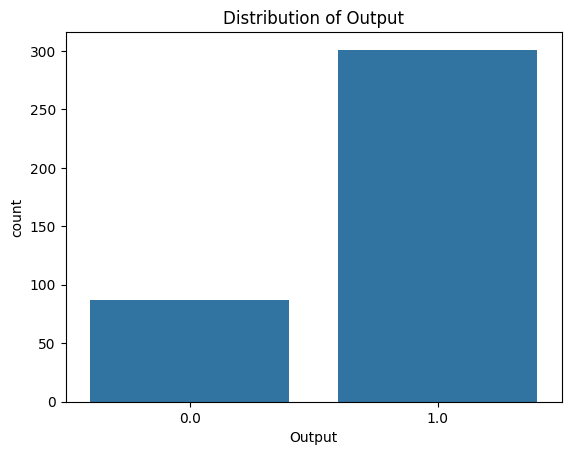

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
# EDA
# Visualize distribution of output (assuming binary classification)
sns.countplot(x='Output', data=data_imputed)
plt.title('Distribution of Output')
plt.show()


**STEP 5: TRAIN - TEST SPLIT**

In [7]:
# Step 5
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6 - TRAINING THE MODELS
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

# Initializing  models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "MLP": MLPClassifier(max_iter=1000),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(),
    "Naive Bayes": GaussianNB()
}
# Training the models
for name, model in models.items():
    model.fit(X_train, y_train)




**PERCEPTRON LEARNING ALGORITHM - PLA**

In [16]:
# PLA
from sklearn.linear_model import Perceptron


pla = Perceptron()

# Train PLA
pla.fit(X_train, y_train)

# Step 7: Test the PLA model
print("Classification Report for PLA:")
y_pred_pla = pla.predict(X_test)
print(classification_report(y_test, y_pred_pla))
print("="*60)



Classification Report for PLA:
              precision    recall  f1-score   support

         0.0       0.15      1.00      0.27        12
         1.0       0.00      0.00      0.00        66

    accuracy                           0.15        78
   macro avg       0.08      0.50      0.13        78
weighted avg       0.02      0.15      0.04        78



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**STEP 7 : TESTING THE MODELS**

In [9]:
 #Step 7
from sklearn.metrics import accuracy_score

# Test models
results = {}
for name, model in models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy

**STEP 8 : ANALYSING PERFORMANCE**

In [10]:
print("Model Performance:")
for name, acc in results.items():
    print(f"{name}: {acc}")

Model Performance:
Logistic Regression: 0.8461538461538461
MLP: 0.8589743589743589
KNN: 0.8974358974358975
SVM: 0.8461538461538461
Naive Bayes: 0.7564102564102564


**CLASSIFICATION REPORTS**

In [11]:
from sklearn.metrics import classification_report

# Step 7: Test the models and generate classification reports
for name, model in models.items():
    print(f"Classification Report for {name}:")
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))
    print("="*60)


Classification Report for Logistic Regression:
              precision    recall  f1-score   support

         0.0       0.50      0.08      0.14        12
         1.0       0.86      0.98      0.92        66

    accuracy                           0.85        78
   macro avg       0.68      0.53      0.53        78
weighted avg       0.80      0.85      0.80        78

Classification Report for MLP:
              precision    recall  f1-score   support

         0.0       1.00      0.08      0.15        12
         1.0       0.86      1.00      0.92        66

    accuracy                           0.86        78
   macro avg       0.93      0.54      0.54        78
weighted avg       0.88      0.86      0.80        78

Classification Report for KNN:
              precision    recall  f1-score   support

         0.0       0.67      0.67      0.67        12
         1.0       0.94      0.94      0.94        66

    accuracy                           0.90        78
   macro avg       

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**STEP 9: ROC CURVES**

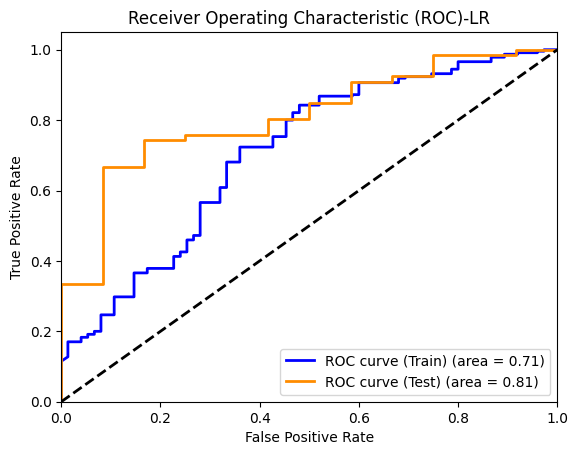

Accuracy of the KMeans Clustering model
Inference : Area under the curve is in the range of 0.5 - 1.0 which indicates that the model predicts positves and negatives correctly in most of the cases 
The model does not overfit as area under the curve is not exceeding 0.99


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [12]:
# Step 9: Represent the training and testing results using ROC curves.


from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming Logistic Regression is the chosen model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict probabilities
y_train_probs = model.predict_proba(X_train)[:, 1]
y_test_probs = model.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area for training set
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_probs)
roc_auc_train = auc(fpr_train, tpr_train)

# Compute ROC curve and ROC area for testing set
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_probs)
roc_auc_test = auc(fpr_test, tpr_test)

# Plot ROC curve
plt.figure()
plt.plot(fpr_train, tpr_train, color='blue', lw=2, label='ROC curve (Train) (area = %0.2f)' % roc_auc_train)
plt.plot(fpr_test, tpr_test, color='darkorange', lw=2, label='ROC curve (Test) (area = %0.2f)' % roc_auc_test)
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)-LR')
plt.legend(loc="lower right")
plt.show()


# Step 10: Clustering task using K-Means algorithm

from sklearn.cluster import KMeans

# Initialize KMeans
kmeans = KMeans(n_clusters=2)  # Assuming 2 clusters for demonstration

# Fit KMeans model
kmeans.fit(X)

# Measurement of performance
from sklearn.metrics import silhouette_score


print("Accuracy of the KMeans Clustering model")
silhouette_score(X, kmeans.labels_)


print("Inference : Area under the curve is in the range of 0.5 - 1.0 which indicates that the model predicts positves and negatives correctly in most of the cases ")

print("The model does not overfit as area under the curve is not exceeding 0.99")

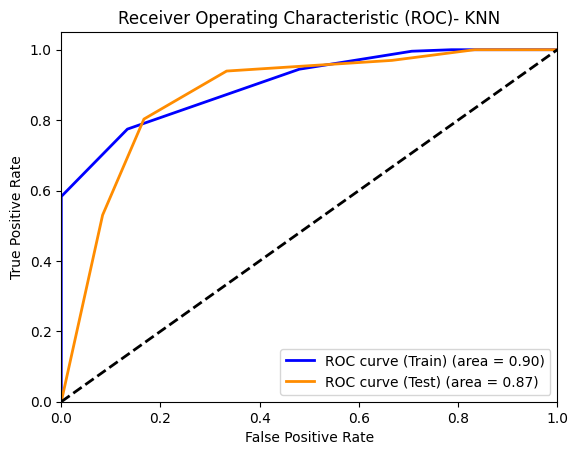

INFERENCE : THE AREA UNDER THE CURVE FOR TRAIN AND TESTING DATA IS 0.90 AND 0.88 RESPECTIVELY. AS THE VALUE IS ABOVE 0.5 AND BELOW 1.0, THE MODEL CAN BE CONSIDERED FOR MAKING FAIRLY GOOD PREDICTIONS
THE MODEL IS NOT OVERFIT OR UNDERFIT


In [13]:
#ROC FOR KNN
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming Logistic Regression is the chosen model
model = KNeighborsClassifier()
model.fit(X_train, y_train)

# Predict probabilities
y_train_probs = model.predict_proba(X_train)[:, 1]
y_test_probs = model.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area for training set
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_probs)
roc_auc_train = auc(fpr_train, tpr_train)

# Compute ROC curve and ROC area for testing set
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_probs)
roc_auc_test = auc(fpr_test, tpr_test)

# Plot ROC curve
plt.figure()
plt.plot(fpr_train, tpr_train, color='blue', lw=2, label='ROC curve (Train) (area = %0.2f)' % roc_auc_train)
plt.plot(fpr_test, tpr_test, color='darkorange', lw=2, label='ROC curve (Test) (area = %0.2f)' % roc_auc_test)
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)- KNN')
plt.legend(loc="lower right")
plt.show()

print("INFERENCE : THE AREA UNDER THE CURVE FOR TRAIN AND TESTING DATA IS 0.90 AND 0.87 RESPECTIVELY. AS THE VALUE IS ABOVE 0.5 AND BELOW 1.0, THE MODEL CAN BE CONSIDERED FOR MAKING FAIRLY GOOD PREDICTIONS")

print("THE MODEL IS NOT OVERFIT OR UNDERFIT")


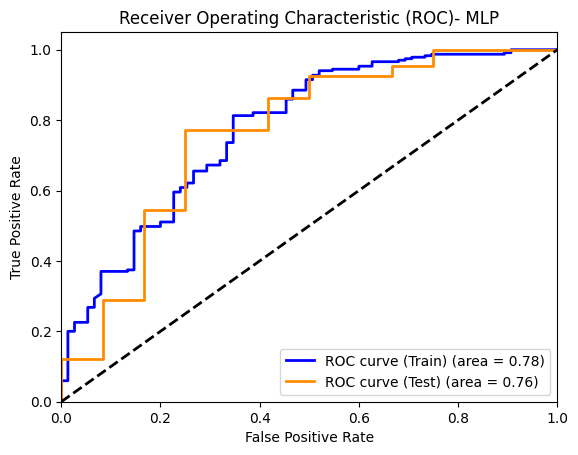

INFERENCE : THE AREA UNDER THE CURVE FOR TRAIN AND TESTING DATA IS 0.58 AND 0.62 RESPECTIVELY. AS THE VALUE IS CLOSE TO 0.5 THE MODEL IS NOT ABLE TO FAIRLY DISTINGUISH
THE MODEL IS NOT OVERFIT


In [14]:
#ROC FOR mlp
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


model = MLPClassifier(max_iter=1000)
model.fit(X_train, y_train)

# Predict probabilities
y_train_probs = model.predict_proba(X_train)[:, 1]
y_test_probs = model.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area for training set
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_probs)
roc_auc_train = auc(fpr_train, tpr_train)

# Compute ROC curve and ROC area for testing set
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_probs)
roc_auc_test = auc(fpr_test, tpr_test)

# Plot ROC curve
plt.figure()
plt.plot(fpr_train, tpr_train, color='blue', lw=2, label='ROC curve (Train) (area = %0.2f)' % roc_auc_train)
plt.plot(fpr_test, tpr_test, color='darkorange', lw=2, label='ROC curve (Test) (area = %0.2f)' % roc_auc_test)
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)- MLP')
plt.legend(loc="lower right")
plt.show()

print("INFERENCE : THE AREA UNDER THE CURVE FOR TRAIN AND TESTING DATA IS 0.78 AND 0.76 RESPECTIVELY. AS THE VALUE IS CLOSE TO 0.5 THE MODEL IS NOT ABLE TO FAIRLY DISTINGUISH")

print("THE MODEL IS NOT OVERFIT")




**RESULTS**

Conclusion :

Although the accuracy of KNN and MLP model is almost the same and the maximum out of all other models, KNN outstands MLP in terms of Area Under Curve (AUC)

Higher the value of AUC, indicates better chances for the model to make accurate predictions

Therefore, KNN can be used for solving this ML problem

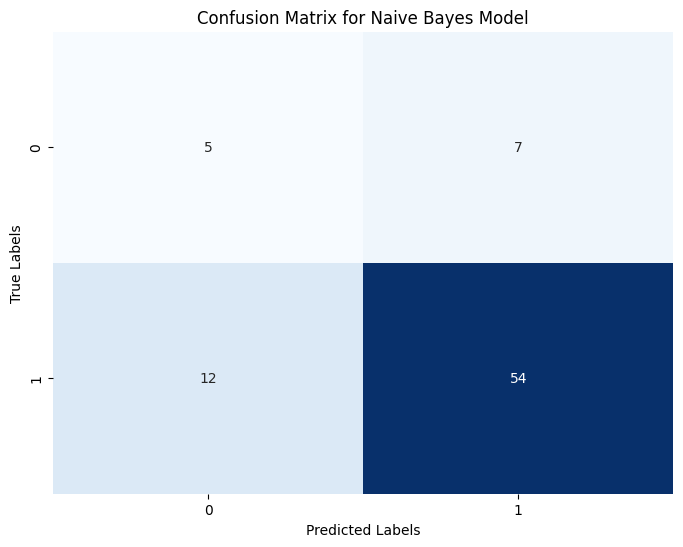

In [18]:
#ADDITIONAL EVALUATION OF NAIVE BAYES MODEL
from sklearn.metrics import confusion_matrix
import seaborn as sns


model = models['Naive Bayes']


y_pred = model.predict(X_test)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Naive Bayes Model')
plt.show()
